***ETFs*** (AKA exchange-traded funds): 
- Offshoots of mutual funds that allow investors to trade portfolios of securities just as they do shares of stock.
- https://www.investopedia.com/terms/e/etf.asp

In summary, some ETFs are great but some just suck. Anybody can make an ETF out of anything, so you shouldn't assume that some fund is great just b/c it's packaged as an ETF. ETFs are roughly divided into 3 buckets:

## The Good

- The best ETFs are passive, low cost index trackers - transparent, highly liquid instruments that do exactly what their name states. 
- ***the SPY***: This fund invests its assets as close to the S&P 500 index as possible, using computerized method to ensure low cost and close tracking. When you buy SPY, you know exactly what you get - you get the index, minus 10 basis points per year in cost. That's much better than what mutual fund industry can offer you.
- Roughly 80-90% or all mutual funds fail to beat their benchmark.. but people still buy them b/c the banks advise their clients to buy their own overpried and underperforming mutal funds. Instead, just buy a low cost tracking and know exactly what you get.

## The Bad

- Anybody can turn anything into an ETF.. so ETF doesn't mean anything except that it's a fund that can be bought and sold via some sort of exchange. Doesn't mean liquid, low cost, index tracking, or transparent even.
- Some ETFs are very small and very illiquid. In the ETF space, anything less than a billion is tiny, anything under 100 million is dumb but if you trade anything that small, be careful with executions and don't trade too big.
- Check **net asset value** and daily trading volume of ETF before considering it. Make sure you can easily go in/out of the fund. If your position is 10% or more of the average daily trading volume, you're too exposed.
- ETFs vs ETNs
    - ETFs: you theoretically own the underling shares. The ETF holds a basket of securities for you. If ETF provider blows up, you can get part of your underlying shares back. If you have a large enough position (50,000 shares), you can ask for the shares at any time.
    - **ETNs: (Exchange Traded Notes)** are structured products. They are debt instruments, where a company promises to pay you basd on the performance of an underlying index.. which may be a stock market or any math formula. You DON'T OWN any underlying security, you just hold the PROMISE. How the ETN provider hedges their side to pay you is their business and if they blow up, you won't see your cash back. **Be careful with ETNS.**
    - ETN structure is common in *commodity funds*. With such funds, it's important to look closely at what they actually are and what they actually do. Example: for standard index ETF, the fund can just buy the underlying.. but don't expect that crude oil fund will match the return of physical crude b/c they buy and roll oil **futures** not actual barrels of oils.
    - A **futures contract** calls for delivery of an asset (or in some cases, its cash value) at a specified delivery or maturity date for an agreed-upon price, called the futures price, to be paid at contract maturity. The long position is held by the trader who commits to purchasing the asset on the delivery date. The trader who takes the short position commits to delivering the asset at contract maturity.
    - Commodity ETF/ETN products are akin to futures funds.. have little in common with index trackers. Don't look at the name/description of the fund and expect to get a return similar to the underlying spot. Be aware of what you're actually buying.
    - *Futures are different than spot.*
        - https://www.investopedia.com/ask/answers/062315/how-are-commodity-spot-prices-different-futures-prices.asp
    
### Data
https://www.marketwatch.com/investing/fund/uso/profile
- Historical price data for WTI can be found at a website by the Energy Information Administration of the Department of Energy. It is listed as WTI, Cushing, Oklahoma. https://www.eia.gov/dnav/pet/hist/RWTCD.htm
- https://finance.yahoo.com/quote/USO/history?p=USO&.tsrc=fin-srch
- USO ETF (might need to pay..)
    - https://eodhistoricaldata.com/knowledgebase/stock-etfs-fundamental-data-feeds/
    - https://product.intrinio.com/pricing/us-exchange-traded-fund-etf-current-holdings?show=true
    - https://www.worldtradingdata.com/documentation#full-history  (basic package is free)
    - https://www.quandl.com/databases/ETFG/data
    - https://iextrading.com/developer/docs/
    - https://www.alphavantage.co/documentation/
    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('oil_etf_vs_spot.csv', index_col='Date', parse_dates=['Date'])
df.head()

,WTI-West-Texas-Intermediate,USO
Date,,
2006-04-10,68.15,68.02
2006-04-11,68.67,68.20
2006-04-12,68.95,67.84
2006-04-13,68.52,68.82
2006-04-17,69.63,69.79


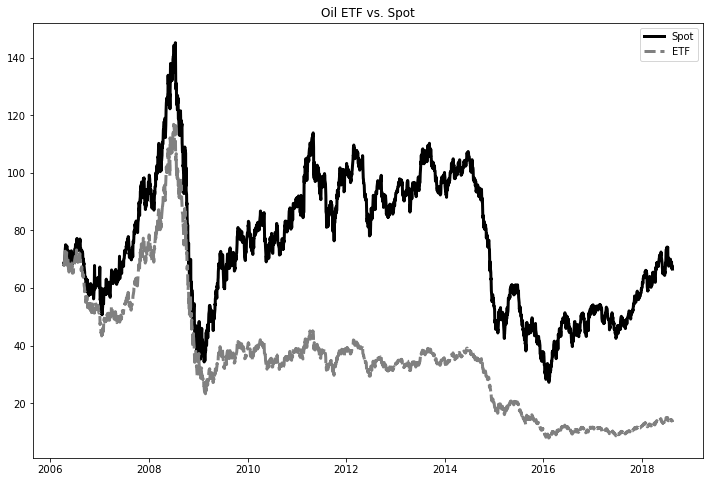

In [4]:
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(111)
ax.set_title('Oil ETF vs. Spot')
ax.plot(df['WTI-West-Texas-Intermediate'], linestyle='-', label='Spot', linewidth=3.0, color='black')
ax.plot(df['USO'], linestyle='--', label='ETF', linewidth=3.0, color = 'grey')
ax.legend()

## The Ugly
Leveraged and inverse ETFs.

Short ETFs are obvious traps. 
- Ex: ProsShares Short S&P500 (SH) promises you the inverse performance of the S&P 500 index. It pretty much does, but b/c they are structured products.. they have a daily rebalance. They're designed to produce the inverse return on any single day - by daily rebalance.
- Inverse ETFs are created by using futures or swaps. If the ETF has 2 billion in assets, they need to put on a short exposure of 2 billion, using derivatives. This position is rebalanced daily to ensure that the daily return of the ETF is inverse from the underlying market, any given day.
    - https://www.investopedia.com/trading/using-derivatives-to-hedge-risk/

In [5]:
# range of 50 days
df = pd.DataFrame(index=range(50))

# Assume we have an index that wobbles up and down in a range for a period of time.
# Set odd days to +3%
# Set even days to -2.913%
df.loc[df.index % 2 == 1,'underlying_return'] = 0.03
df.loc[df.index % 2 == 0,'underlying_return'] = -0.02913

In [6]:
df.head()

,underlying_return
0,-0.02913
1,0.03000
2,-0.02913
3,0.03000
4,-0.02913


In [7]:
# Calculate the cumulative product - performance over time for 
#  - the underlying
#  - inverse ETF
#  - double inverse ETF

# Start at zero
df.iloc[0].loc['underlying_return'] = 0

# Calculate cumulative series
df['underlying_price'] = (df['underlying_return'] + 1).cumprod()

# Inverse ETF
df['short_return'] = df['underlying_return'] * -1
df['double_short_return'] = df['underlying_return'] * -2

# Double Inverse
df['short_price'] = (df['short_return'] + 1).cumprod()
df['double_short_price'] = (df['double_short_return'] + 1).cumprod()

In [8]:
df.head()

,underlying_return,underlying_price,short_return,double_short_return,short_price,double_short_price
0,0.00000,1.000000,-0.00000,-0.00000,1.000000,1.000000
1,0.03000,1.030000,-0.03000,-0.06000,0.970000,0.940000
2,-0.02913,0.999996,0.02913,0.05826,0.998256,0.994764
3,0.03000,1.029996,-0.03000,-0.06000,0.968308,0.935079
4,-0.02913,0.999992,0.02913,0.05826,0.996515,0.989556


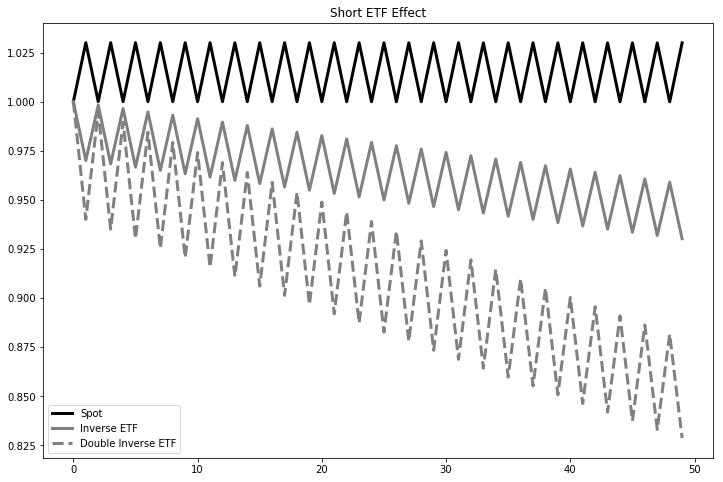

In [9]:
# Make  new figure and set the size.
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['underlying_price'], linestyle='-', label='Spot', linewidth=3.0, color='black')
ax.plot(df['short_price'], linestyle='-', label='Inverse ETF', linewidth=3.0, color = 'grey')
ax.plot(df['double_short_price'], linestyle='--', label='Double Inverse ETF', linewidth=3.0, color = 'grey')
ax.legend()

Inverse ETFs should almost never be traded, unless you have a very good reason in the short term.

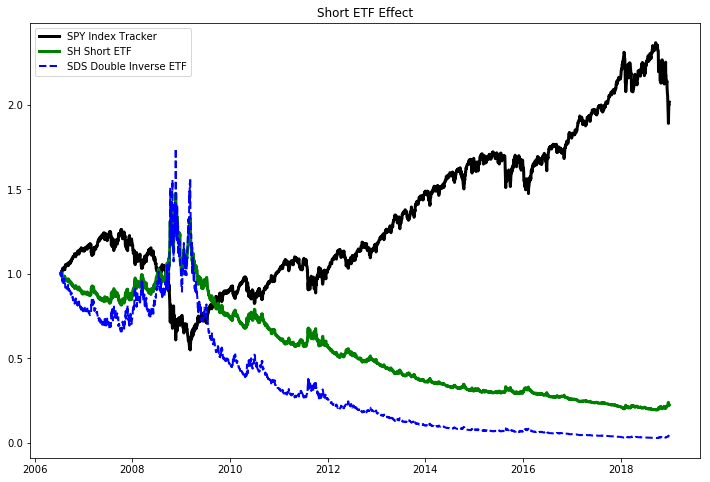

In [12]:
# Function for recalculating series with a common base
def rebased(ts):
    return ts / ts[0]

df = pd.read_csv('short_etfs.csv', index_col='Date', parse_dates=['Date'])

# Calculate all series starting from first value.
df = df.apply(rebased)

# Make  new figure and set the size.
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['SPY'], linestyle='-', label='SPY Index Tracker', linewidth=3.0, color='black')
ax.plot(df['SH'], linestyle='-', label='SH Short ETF', linewidth=3.0, color = 'green')
ax.plot(df['SDS'], linestyle='--', label='SDS Double Inverse ETF', linewidth=2.0, color = 'blue')
ax.legend()

Above is actual performance of the S&P index tracker compared to the inverse and double inverse ETF. Although the inverse funds briefly spike up during short term market distress, over the course of months/years the index tracker goes down substantially.

### Shorting ETFs
Apart from really enormously liquid ETFs, you won't be able to short. Things have to happen behind the computer screens. When you short a stock or ETF, someone is LENDING it to you - the transaction doesn't happen in a vacuum. In simulation platforms, you can short anything in any scale at zero cost, but in reality that isn't the case.

First, your broker needs to locate the shares. They have to find another client who's happy to hold those shares long term and is willing to lend them for shorting. This is an institution who has a long term holding and wants to make a little extra on the side on the lending.

Borrowing major ETFs and stocks is usually no problem, but to short ETFs beyond the very top, very liquid ones, it'll be very difficult to locate them.. and even if you do find them they'll be expensive.

Shorting the SPY is easy, but shorting something more exotic like natural gas ETF - you'll find no lenders or you'll have to pay so much that it won't be worth it. The lenders need to be compensated, like paying an interest rate on them. How high depends on how difficult the share is to borrow and how important you are to the broker. If you plan to hold your shorts for a while, this cost can add up and ruin your strategy.

Also, the shares can be called back at any time. There is not historical data on when stocks are recalled, so you can't model/predict this factor.

Don't assume that you can short something whenever you like, however you like, and hold for as long as you like. Backtesting software lets you do whatever, but that's not how it works in reality.